In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons
from pycaret.classification import setup, compare_models, tune_model, evaluate_model, create_model

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Генерируем данные

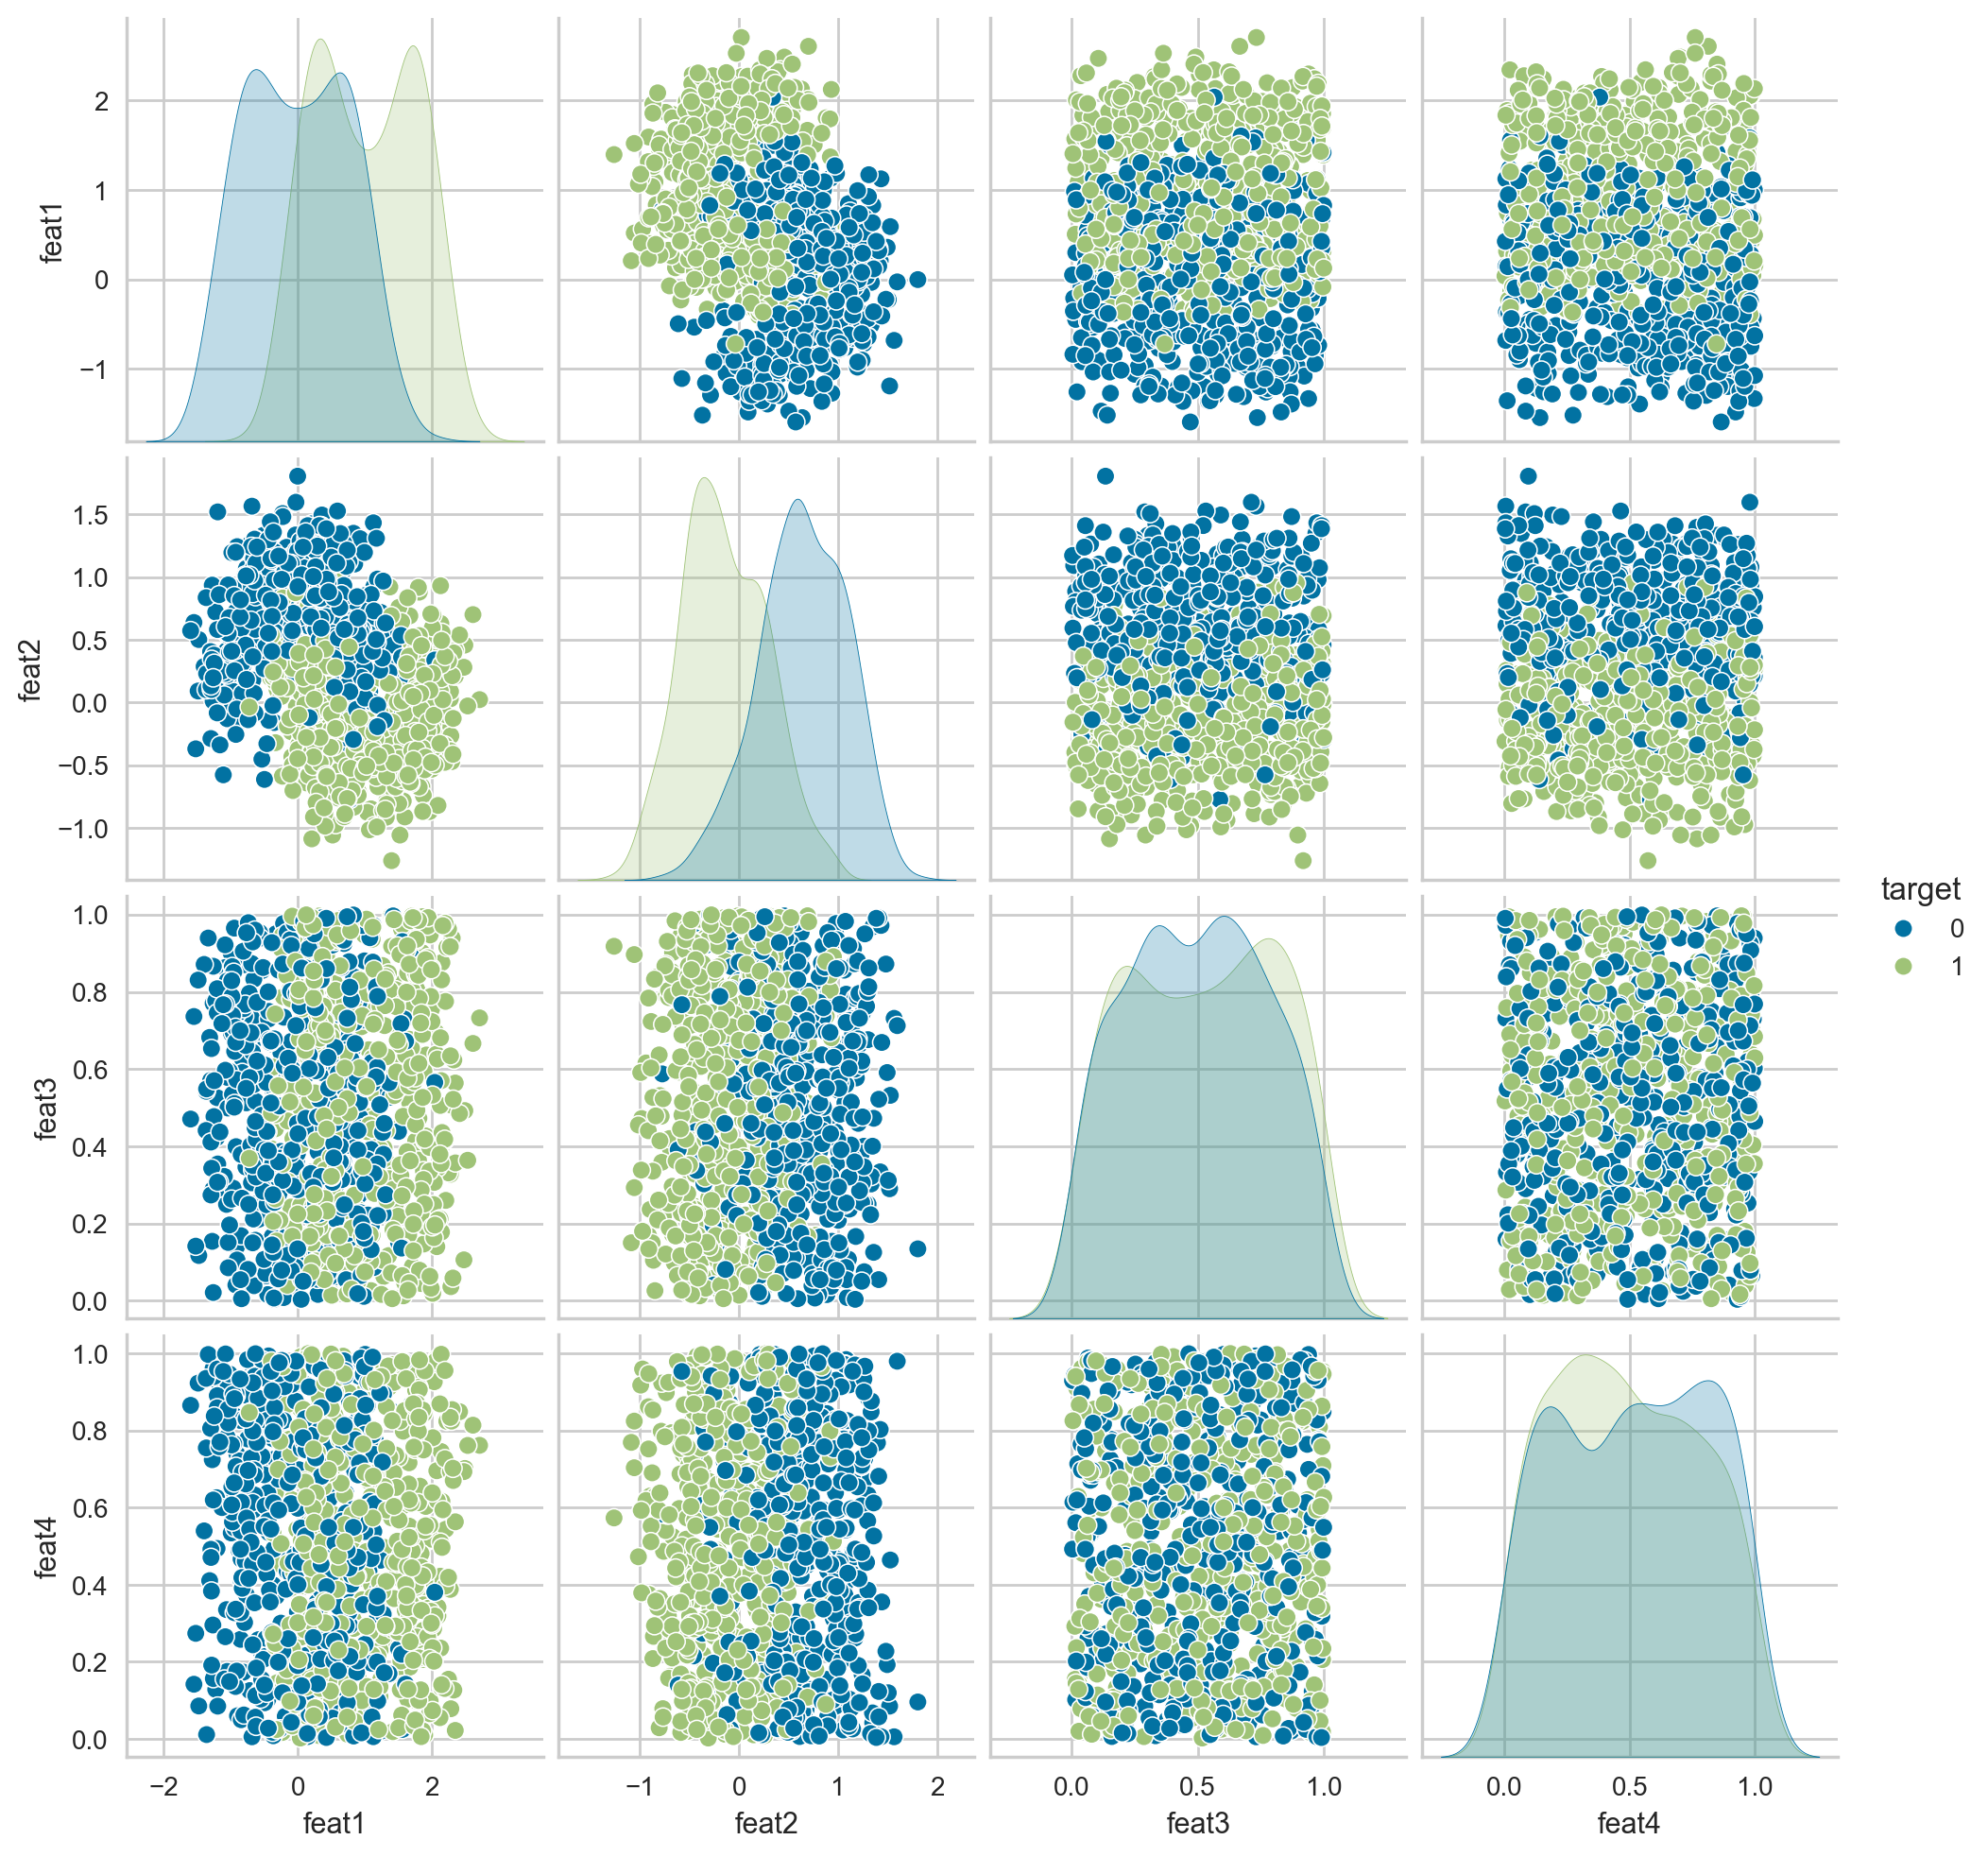

In [2]:
X, y = make_moons(n_samples=1_000, random_state=0, noise=0.3)

df = pd.DataFrame({
    'feat1': X[:, 0],
    'feat2': X[:, 1],
    'feat3': np.random.rand(X.shape[0]),
    'feat4': np.random.rand(X.shape[0]),
    'target': y
})

sns.pairplot(df, hue='target')

In [3]:
df.head()

,feat1,feat2,feat3,feat4,target
0,2.129573,0.629904,0.355006,0.966837,1
1,1.888882,0.146257,0.745822,0.010613,1
2,-0.190357,0.383993,0.325514,0.199577,0
3,-0.404416,0.195282,0.394454,0.633929,1
4,0.373012,-0.429716,0.467687,0.666635,1


## Инициализация PyCaret

In [4]:
s = setup(data=df, target='target', log_experiment=True)

,Description,Value
0,Session id,3123
1,Target,target
2,Target type,Binary
3,Original data shape,"(1000, 5)"
4,Transformed data shape,"(1000, 5)"
5,Transformed train set shape,"(700, 5)"
6,Transformed test set shape,"(300, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


2025/07/02 15:22:06 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


## Сравнение доступных алгоритмов

In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9114,0.9609,0.9171,0.9103,0.9118,0.8229,0.8261,0.0190
rf,Random Forest Classifier,0.9043,0.9590,0.9086,0.9042,0.9049,0.8086,0.8112,0.0260
lightgbm,Light Gradient Boosting Machine,0.9000,0.9592,0.8943,0.9086,0.8998,0.8000,0.8027,0.1710
knn,K Neighbors Classifier,0.8986,0.9509,0.9057,0.8949,0.8994,0.7971,0.7989,0.0090
et,Extra Trees Classifier,0.8971,0.9600,0.9000,0.8977,0.8980,0.7943,0.7958,0.0240
ada,Ada Boost Classifier,0.8914,0.9509,0.8943,0.8918,0.8918,0.7829,0.7848,0.0120
dt,Decision Tree Classifier,0.8714,0.8714,0.8800,0.8687,0.8729,0.7429,0.7455,0.0040
nb,Naive Bayes,0.8457,0.9354,0.8486,0.8472,0.8463,0.6914,0.6941,0.0040
qda,Quadratic Discriminant Analysis,0.8457,0.9341,0.8543,0.8430,0.8472,0.6914,0.6939,0.0030
lr,Logistic Regression,0.8443,0.9341,0.8457,0.8482,0.8449,0.6886,0.6918,0.3470


2025/07/02 15:22:16 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/07/02 15:22:16 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/07/02 15:22:17 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/07/02 15:22:17 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/07/02 15:22:17 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/07/02 15:22:17 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

In [6]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Подбор гиперпараметров

In [7]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8857,0.9527,0.8286,0.9355,0.8788,0.7714,0.7765
1,0.9143,0.9608,0.9714,0.8718,0.9189,0.8286,0.8340
2,0.9143,0.9641,0.9143,0.9143,0.9143,0.8286,0.8286
3,0.9286,0.9543,0.8857,0.9688,0.9254,0.8571,0.8603
4,0.9000,0.9690,0.9429,0.8684,0.9041,0.8000,0.8030
5,0.9429,0.9714,0.9429,0.9429,0.9429,0.8857,0.8857
6,0.9571,0.9861,0.9143,1.0000,0.9552,0.9143,0.9177
7,0.9143,0.9429,0.9143,0.9143,0.9143,0.8286,0.8286
8,0.8714,0.9249,0.8857,0.8611,0.8732,0.7429,0.7432


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2025/07/02 15:22:27 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


## Анализ модели

In [8]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…